In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import math

# Expected value from playing Keno

### The paytable was taken from https://lotto-centrum.com/keno-tabela_wygranych:

In [8]:
table = {
    '10': [200_000, 3_000, 250, 32, 6, 2, 0, 0, 0, 2, 6], 
    '9': [0, 50_000, 750, 100, 10, 4, 2, 0, 0, 0, 2],
    '8': [0, 0, 10_000, 300, 44, 8, 2, 0, 0, 0 , 2],
    '7': [0, 0, 0, 1_500, 66, 8, 4, 2, 0, 0, 0],
    '6': [0, 0, 0, 0, 500, 54, 6, 2, 0, 0, 0],
    '5': [0, 0, 0, 0, 0, 250, 18, 4, 0, 0, 0],
    '4': [0, 0, 0, 0, 0, 0, 60, 4, 2, 0, 0],
    '3': [0, 0, 0, 0, 0, 0, 0, 18, 4, 0, 0],
    '2': [0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0],
    '1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
}

df = pd.DataFrame(data = table)
df

,10,9,8,7,6,5,4,3,2,1
0,200000,0,0,0,0,0,0,0,0,0
1,3000,50000,0,0,0,0,0,0,0,0
2,250,750,10000,0,0,0,0,0,0,0
3,32,100,300,1500,0,0,0,0,0,0
4,6,10,44,66,500,0,0,0,0,0
5,2,4,8,8,54,250,0,0,0,0
6,0,2,2,4,6,18,60,0,0,0
7,0,0,0,2,2,4,4,18,0,0
8,0,0,0,0,0,0,2,4,14,0
9,2,0,0,0,0,0,0,0,0,3


In [9]:
def expected_value_keno(how_many_numbers_we_choose, paytable):
    n = how_many_numbers_we_choose
    
    winnings = df[str(n)] #extract indicated column
    winnings = winnings[10-n:] #skip the first zeros
    winnings = winnings.tolist() #convert column (pandas series) to a list
    
    expected_value = 0
    k = len(winnings) - 1
    t = len(winnings) - 1
    for i in range(len(winnings)):
        expected_value += (math.comb(20, k)*math.comb(50, t-k)*winnings[i])/math.comb(70, t)
        k -= 1
        
    return -2 + expected_value

### Expected value per one PLN invested in the game as a function of the amount of the chosen numbers

In [10]:
lst2 = [[expected_value_keno(i, df)/2, i] for i in range(1,11)]
lst2

[[-0.5714285714285714, 1],
 [-0.4492753623188406, 2],
 [-0.46547314578005117, 3],
 [-0.4632973241210826, 4],
 [-0.4289645537880069, 5],
 [-0.460250594159057, 6],
 [-0.4573379058243737, 7],
 [-0.4572206273450691, 8],
 [-0.46151644274243886, 9],
 [-0.45746503338889966, 10]]

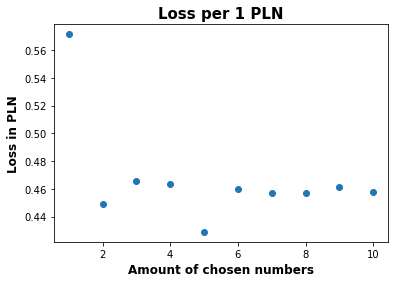

In [11]:
lst3 = [abs(expected_value_keno(i, df)/2) for i in range(1,11)]
fig, ax = plt.subplots()


ax.set_title("Loss per 1 PLN", fontsize = 15, fontweight =  'bold')
plt.xlabel('Amount of chosen numbers', fontsize = 12, fontweight = 'bold')
plt.ylabel('Loss in PLN', fontsize =12, fontweight = 'bold')
xmin, xmax = plt.xlim()
plt.scatter(range(1,11), lst3, marker = 'o')
plt.show()

# Conclusions 

1. The player statistically losses the least amount of money when choosing 5 numbers. The loss amounts to 0.42 PLN for every 1 PLN invested into the game.

2. The loss when choosing the different amount of numbers is similar except for choosing only one number. In that case, the loss amounts to 0.57 PLN for every 1 PLN invested into the game